In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
from pprint import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt

import cellcycle.PlottingTools as plottingTools
from cellcycle.ParameterSet import ParameterSet
import cellcycle.DataStorage as dataStorage
import cellcycle.DataAnalysis as dataAnalysis
import cellcycle.MakeDataframe as makeDataframe

In [2]:
file_path = '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/SI/S4_LD_synth'
parameter_path = os.path.join(file_path, 'parameter_set.csv')

In [3]:
pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)

In [4]:
v_init_exp = 0.28
std_exp = 0.05

In [5]:
data_frame = makeDataframe.make_dataframe(file_path)
data_frame = makeDataframe.add_average_values_to_df(data_frame)
data_frame = makeDataframe.add_theoretical_init_reg_concentrations_to_df(data_frame)
data_frame

['/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/SI/S4_LD_synth/LD_100',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/SI/S4_LD_synth/LD_10',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/SI/S4_LD_synth/Fig_SI_LD_synth_comparison_v_init.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/SI/S4_LD_synth/LD_no_synth_20',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/SI/S4_LD_synth/LD_no_synth_10',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/SI/S4_LD_synth/LD_no_synth_100',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/SI/S4_LD_synth/LD_20',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/SI/S4_LD_synth/Fig_SI_LD_synth_comparison_amplitude.pdf']


,simu_name,simu_path,sub_simu_name,sub_simu_path,path_parameter_file,path_dataset,n_series,id,root_path,file_name,...,cv_added_volume,average_init_conc,average_init_conc_normalized,average_volume,average_n_ori,v_init_per_n_ori,v_init,average_reg_conc_th,average_init_conc_th,average_init_conc_th_normalized
0,LD_100,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate_0,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,20,0,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate,...,0.2,362.452619,1.812263,0.286727,1.500750,0.280937,0.280937,363.321831,363.321831,1.816609
1,LD_100,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate_17,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,20,17,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate,...,0.2,273.685014,1.368425,1.004426,5.175718,0.284361,1.137443,274.899584,274.899584,1.374498
2,LD_100,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate_5,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,20,5,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate,...,0.2,317.984206,1.589921,0.414040,2.054605,0.281980,0.563960,316.995410,316.995410,1.584977
3,LD_100,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate_6,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,20,6,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate,...,0.2,312.257888,1.561289,0.445523,2.259626,0.282096,0.564192,312.680224,312.680224,1.563401
4,LD_100,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate_18,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,20,18,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate,...,0.2,271.615082,1.358075,1.081590,5.594559,0.284655,1.138619,272.707153,272.707153,1.363536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,LD_20,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate_7,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,20,7,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate,...,NaN,134.835436,1.348354,0.501916,2.489345,0.293650,0.587300,135.193001,135.193001,1.351930
116,LD_20,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate_12,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,20,12,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate,...,NaN,130.353161,1.303532,0.736004,3.543715,0.299945,0.599890,130.308729,130.308729,1.303087
117,LD_20,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate_2,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,20,2,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate,...,NaN,142.657262,1.426573,0.340621,1.714927,0.287199,0.287199,142.627850,142.627850,1.426278
118,LD_20,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate_1,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,20,1,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate,...,NaN,144.913716,1.449137,0.314785,1.608796,0.285981,0.285981,144.975051,144.975051,1.449751


# Calculate initiation volume theoretically

In [6]:
def calculate_v_initi_no_overlap_switch_time_varying(df):
    try:
#         print(df.production_rate_dars1)
        production_rate_dars1 = df.production_rate_dars1
    except:
        production_rate_dars1 = 0
    return df.destruction_rate_datA / df.production_rate_lipids * df.frac_init * \
           (df.michaelis_const_prod + (1 - df.frac_init) * df.total_conc) / \
           ((1 - df.frac_init) * (df.michaelis_const_destr + df.frac_init * df.total_conc))-((production_rate_dars1+ df.production_rate_dars2)/df.production_rate_lipids)

def calculate_v_initi_overlap_switch_time_varying(df):
    try:
#         print(df.production_rate_dars1)
        production_rate_dars1 = df.production_rate_dars1
    except:
        production_rate_dars1 = 0
    return (df.destruction_rate_datA + df.high_rate_datA + df.destruction_rate_rida) / df.production_rate_lipids * df.frac_init * \
           (df.michaelis_const_prod + (1 - df.frac_init) * df.total_conc) / \
           ((1 - df.frac_init) * (df.michaelis_const_destr + df.frac_init * df.total_conc))- \
           ((production_rate_dars1 + df.production_rate_dars2 + df.high_rate_dars2)/df.production_rate_lipids)

data_frame["v_init_per_n_ori_th_no_time_varying"] = data_frame.apply(lambda row: calculate_v_initi_no_overlap_switch_time_varying(row), axis=1)
data_frame["v_init_per_n_ori_th_o_time_varying"] = data_frame.apply(lambda row: calculate_v_initi_no_overlap_switch_time_varying(row), axis=1)


In [7]:
def calculate_v_init_switch_synthesis(df):
    if df.include_synthesis==0:
        return df.destruction_rate_datA / df.production_rate_lipids * df.frac_init * \
               (df.michaelis_const_prod + (1 - df.frac_init) * df.total_conc) / \
               ((1 - df.frac_init) * (df.michaelis_const_destr + df.frac_init * df.total_conc))
    else:
        return (df.destruction_rate_datA/df.total_conc) * \
                df.frac_init / (df.michaelis_const_destr/df.total_conc+ df.frac_init) * \
                (df.michaelis_const_prod / df.total_conc + 1 - df.frac_init) / \
                ((1- df.frac_init) * \
                (df.production_rate_lipids/df.total_conc + df.rate_growth * (df.michaelis_const_prod / df.total_conc + 1 - df.frac_init)))
    
data_frame["v_init_per_n_ori_synthesis"] = data_frame.apply(lambda row: calculate_v_init_switch_synthesis(row), axis=1)


# Calculate CV

In [8]:
for simu_name in data_frame.simu_name.unique():
    simu_df = data_frame[data_frame["simu_name"] == simu_name]
    data_frame.loc[data_frame['simu_name'] == simu_name, 'mean_v_init_per_n_ori'] = np.mean(simu_df["v_init_per_n_ori"])
    data_frame.loc[data_frame['simu_name'] == simu_name, 'stdd_v_init_per_n_ori'] = np.std(simu_df["v_init_per_n_ori"])
    data_frame.loc[data_frame['simu_name'] == simu_name, 'cv_v_init_per_n_ori'] = np.std(simu_df["v_init_per_n_ori"])/np.mean(simu_df["v_init_per_n_ori"])

# Make Legends

In [9]:
def make_production_rate_datA_lipids_cv_legend(destruction_rate_datA, production_rate_lipids, cv):
    return r'$\beta_{{\rm datA}}={}$ /h, $\alpha_{{\rm lipids}}={}$ /h, CV= {}'.format(np.round(destruction_rate_datA,3), 
                                                                                       np.round(production_rate_lipids,3), 
                                                                                       np.round(cv,3))

def make_production_rate_datA_cv_legend(destruction_rate_datA, cv):
    return r'$\beta_{{\rm datA}}={}$ /h, CV= {}'.format(np.round(destruction_rate_datA,3),
                                                        np.round(cv,3))

def make_production_rate_datA_legend(destruction_rate_datA):
    return r'$\beta_{{\rm datA}}={}$ min$^{{-1}}$'.format(int(destruction_rate_datA/60))

def make_synthesis_legend(include_synthesis):
    if include_synthesis==1:
        return r'with synthesis'
    else:
        return r'without synthesis'

def make_production_rate_datA_lipids_legend(destruction_rate_datA, production_rate_lipids):
    return r'$\beta_{{\rm datA}}={}$ /h, \linebreak  $\alpha_{{\rm lipids}}={}$ /h'.format(np.round(destruction_rate_datA,3), 
                                                                                       np.round(production_rate_lipids,3))

def make_theoretical_v_init_legend(v_init_per_n_ori_th_no_time_varying):
    return r'$v^\ast_{{\rm th}}={} \, \mu m^3$'.format(np.round(v_init_per_n_ori_th_no_time_varying,3))


data_frame.loc[:, 'legend_datA_lipids_cv'] = data_frame.apply(lambda row: make_production_rate_datA_lipids_cv_legend(row.destruction_rate_datA,
                                                                                                              row.production_rate_lipids,
                                                                                                              row.cv_v_init_per_n_ori), axis = 1)

data_frame.loc[:, 'legend_datA_cv'] = data_frame.apply(lambda row: make_production_rate_datA_cv_legend(row.destruction_rate_datA,
                                                                                                              row.cv_v_init_per_n_ori), axis = 1)

data_frame.loc[:, 'legend_datA'] = data_frame.apply(lambda row: make_production_rate_datA_legend(row.destruction_rate_datA), axis = 1)

data_frame.loc[:, 'legend_datA_lipids'] = data_frame.apply(lambda row: make_production_rate_datA_lipids_legend(row.destruction_rate_datA,
                                                                                                              row.production_rate_lipids), axis = 1)

data_frame.loc[:, 'legend_v_init_th'] = data_frame.apply(lambda row: make_theoretical_v_init_legend(row.v_init_per_n_ori_th_no_time_varying), axis = 1)


data_frame.loc[:, 'legend_synthesis'] = data_frame.apply(lambda row: make_synthesis_legend(row.include_synthesis), axis = 1)


# Determine minimal activator fraction

In [10]:
def determine_min_frac(filepath_h5, total_conc):
    data_frame_traces = pd.read_hdf(filepath_h5, key='dataset_time_traces')
    fractions = data_frame_traces['active_conc'] / total_conc
    return np.min(fractions[int(fractions.size/2):])

def determine_max_frac(filepath_h5, total_conc):
    data_frame_traces = pd.read_hdf(filepath_h5, key='dataset_time_traces')
    fractions = data_frame_traces['active_conc'] / total_conc
    return np.max(fractions[int(fractions.size/2):])

data_frame.loc[:, 'min_frac'] = data_frame.apply(lambda row: determine_min_frac(row.path_dataset, row.total_conc), axis = 1)
data_frame.loc[:, 'max_frac'] = data_frame.apply(lambda row: determine_max_frac(row.path_dataset, row.total_conc), axis = 1)
data_frame['amplitude_frac'] = data_frame['max_frac']-data_frame['min_frac']
data_frame['relative_change_frac']= data_frame['min_frac']/data_frame['max_frac']

# Plot initiation volume per origin

In [11]:
small_df=data_frame[data_frame['destruction_rate_datA']==120]
small_df=small_df[small_df['include_synthesis']==0]
small_df['v_init_per_n_ori']

Series([], Name: v_init_per_n_ori, dtype: float64)

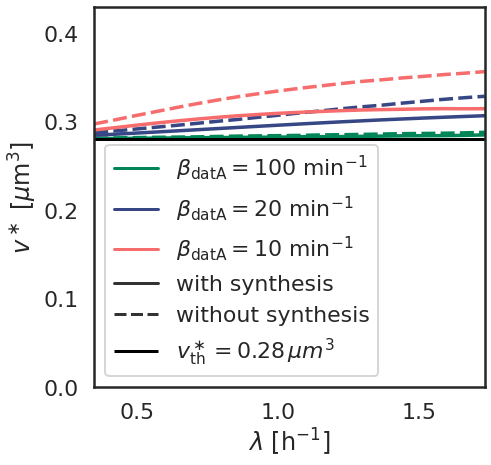

In [12]:
sns.set(style="white")
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(7,7))
sns.lineplot(
    x='rate_growth', 
    y='v_init_per_n_ori',
    data=data_frame.sort_values(by=["destruction_rate_datA"], ascending=False),
    style='legend_synthesis',
    hue='legend_datA',
    palette= [green, blue, pinkish_red], # yellow],
    linewidth = 3.5,
    ax=ax
);
ax.margins(0)

# Theoretical prediction
ax.hlines(data_frame['v_init_per_n_ori_th_no_time_varying'][0], 
            data_frame['rate_growth'].min(), 
            data_frame['rate_growth'].max(), 
            color='black', 
            linestyle='-',
            label= data_frame['legend_v_init_th'].iloc[0])

ax.set(xlabel=r'$\lambda$ [h$^{-1}$]', ylabel=r'$v^\ast$ [$\mu$m$^3$]')
ax.set(ylim=(0,0.43))
handles, labels = ax.get_legend_handles_labels()
handles.pop(4)
labels.pop(4)
ax.legend(handles=handles[1:], labels=labels[1:])
plt.savefig(file_path + '/Fig_SI_LD_synth_comparison_v_init.pdf', format='pdf', bbox_inches='tight')

# Plot amplitude time varying

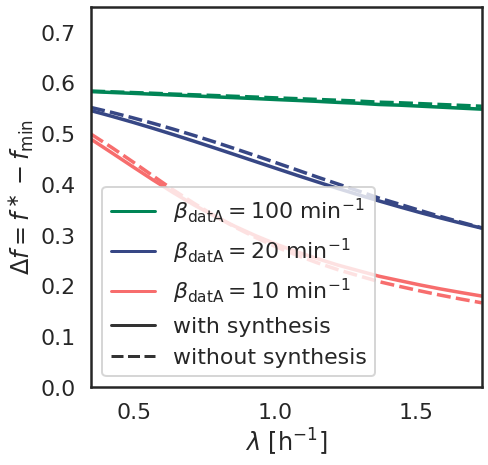

In [13]:
sns.set(style="white")
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(7,7))
sns.lineplot(
    x='rate_growth', 
    y='amplitude_frac',
    data=data_frame.sort_values(by=["destruction_rate_datA"], ascending=False),
    style='legend_synthesis',
    hue='legend_datA',
    palette= [green, blue, pinkish_red], # yellow],
    linewidth = 3.5,
    ax=ax
);
ax.margins(0)
ax.set(xlabel=r'$\lambda$ [h$^{-1}$]', ylabel=r'$\Delta f = f^\ast-f_{\rm min}$')
ax.set(ylim=(0,0.75))
handles, labels = ax.get_legend_handles_labels()
handles.pop(4)
labels.pop(4)
ax.legend(handles=handles[1:], labels=labels[1:])
plt.savefig(file_path + '/Fig_SI_LD_synth_comparison_amplitude.pdf', format='pdf', bbox_inches='tight')